Stephanie Rivera

Time series analysis on the Kaggle dataset "Trending YouTube Video Statistics"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
usa_trending = pd.read_csv("../data/USvideos.csv")

In [3]:
usa_trending.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
#keep relevant columns
youtube_views = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']].copy()

In [5]:
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

datetime.strptime('17.14.11',INPUT_FORMAT).strftime(OUTPUT_FORMAT)

'11-14-2017'

In [6]:
#change weird trending date format
for index, row in youtube_views.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    youtube_views.set_value(index,'trending_date',changed_date)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [7]:
#youtube_views.index = pd.to_datetime(youtube_views.trending_date)

In [8]:
youtube_views.head()
youtube_views['trending_date'] = pd.to_datetime(youtube_views['trending_date'])

In [9]:
youtube_views.head()
youtube_views2 = youtube_views.groupby('trending_date')['views'].agg({"views": "sum"})
#youtube_views2

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


# All Categories

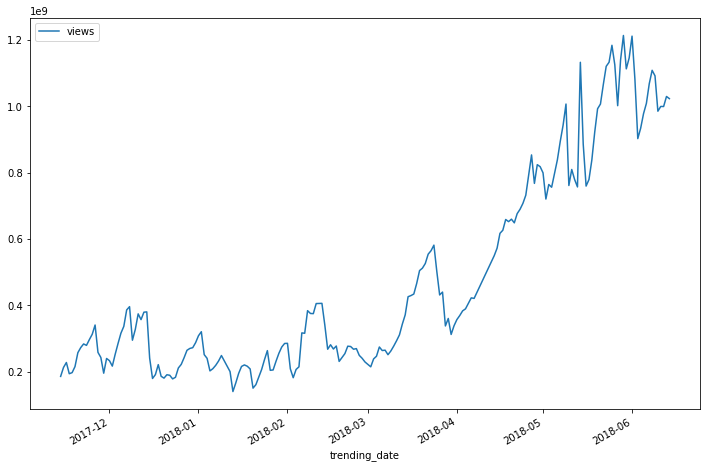

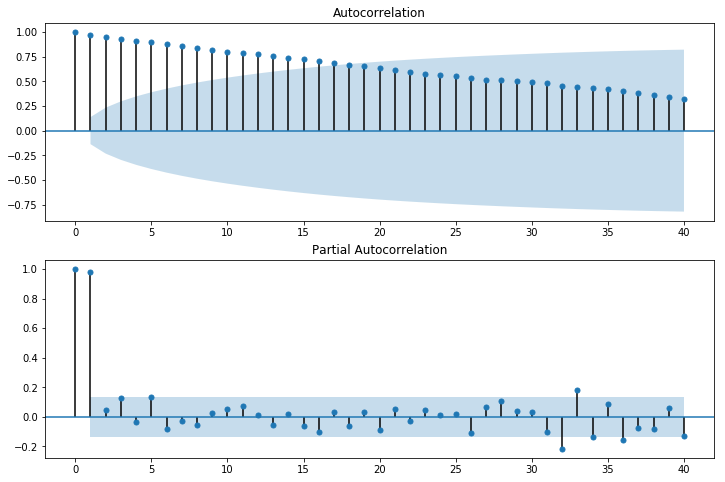

In [10]:
dta = youtube_views2

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [11]:
def get_categoryinfo(data_frame,category):
    cat = category
    data_frame = data_frame.loc[data_frame['category_id'] == cat]
    data_frame['trending_date'] = pd.to_datetime(data_frame['trending_date'])
    data_frame2 = data_frame.groupby('trending_date')['views'].agg({"views": "sum"})
    return data_frame2

In [12]:
#filter data by top 3 categories: music(10), entertainment(24), people & blogs (22)

music = get_categoryinfo(youtube_views,10)
entertainment = get_categoryinfo(youtube_views,24)
ppl_blogs = get_categoryinfo(youtube_views,22)


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


In [13]:

sports = get_categoryinfo(youtube_views,17)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


In [14]:
travel = get_categoryinfo(youtube_views,19)
gaming = get_categoryinfo(youtube_views,20)
vid_blog = get_categoryinfo(youtube_views,21)
horror = get_categoryinfo(youtube_views,39)
comedy = get_categoryinfo(youtube_views,23)


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


In [42]:
action = get_categoryinfo(youtube_views,25)
#news = get_categoryinfo(youtube_views,32)
#family = get_categoryinfo(youtube_views,37)
#doc = get_categoryinfo(youtube_views,35)

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


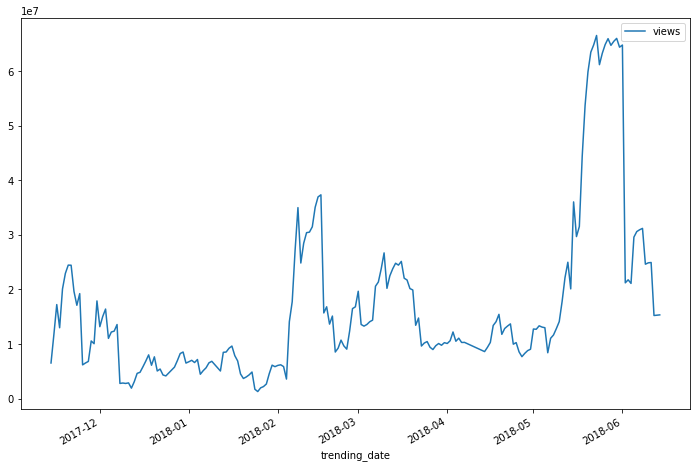

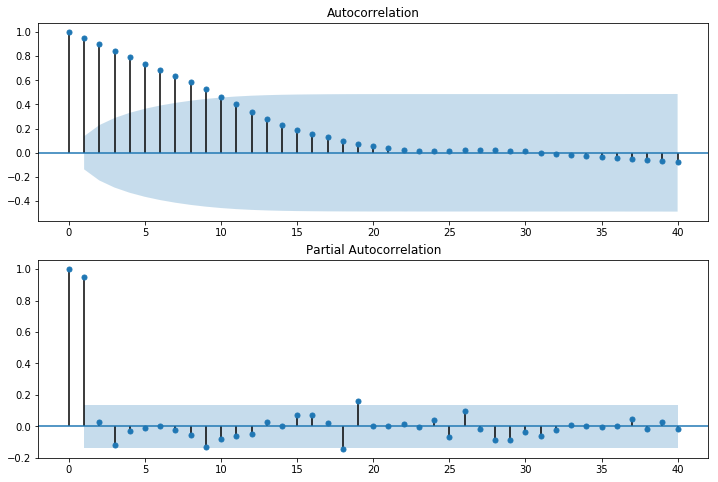

In [49]:
#science and technology
dta = get_categoryinfo(youtube_views,28)

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

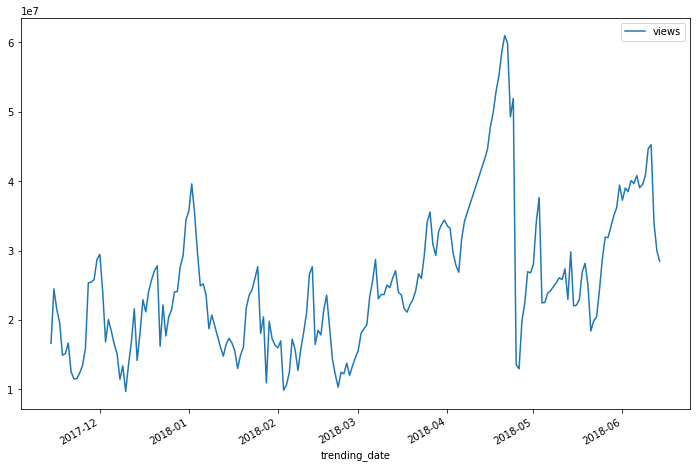

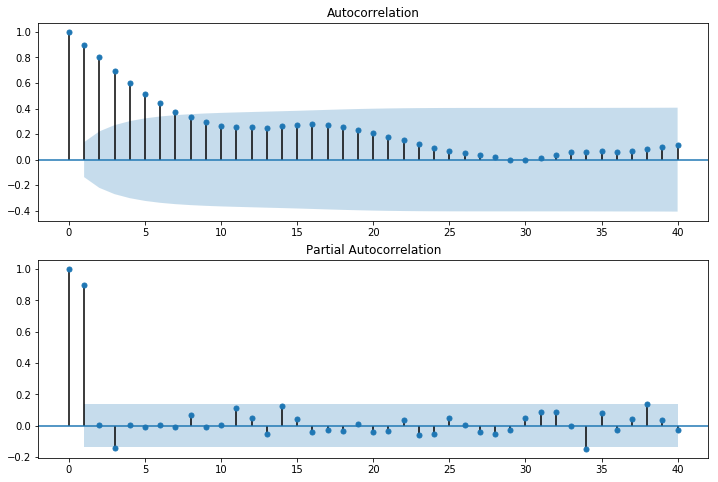

In [123]:
#how to style
dta = get_categoryinfo(youtube_views,26)

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


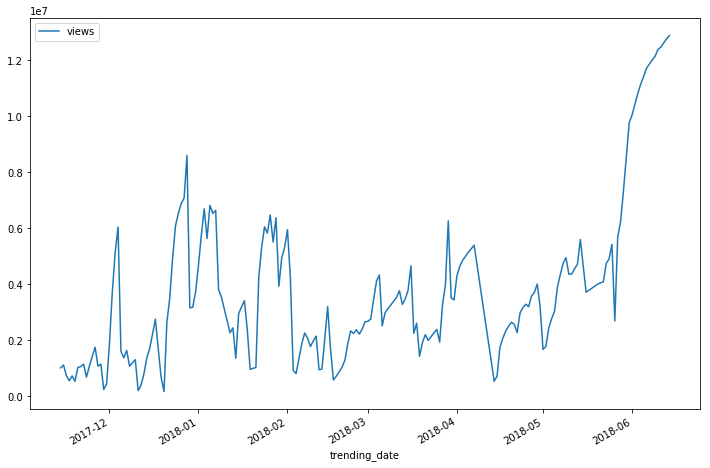

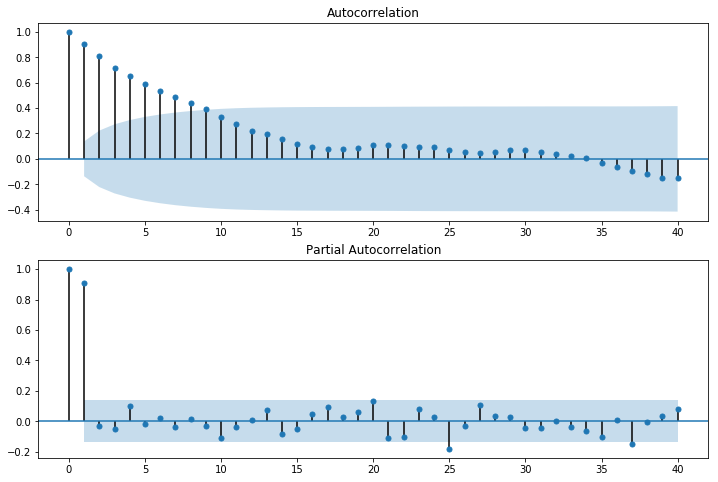

In [55]:
#pets and animals
dta = get_categoryinfo(youtube_views,15)

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

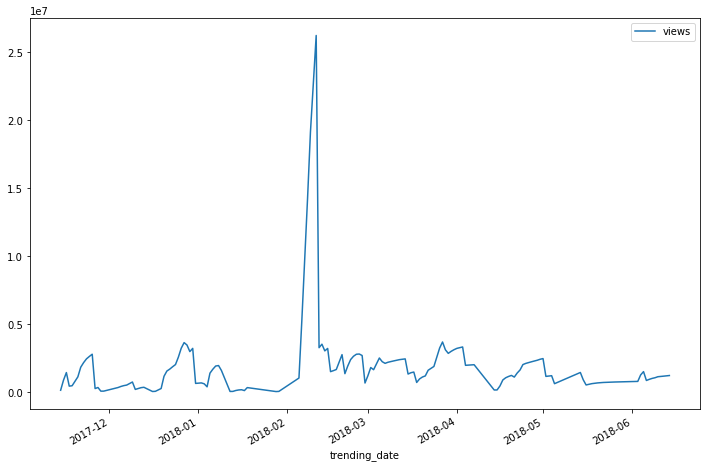

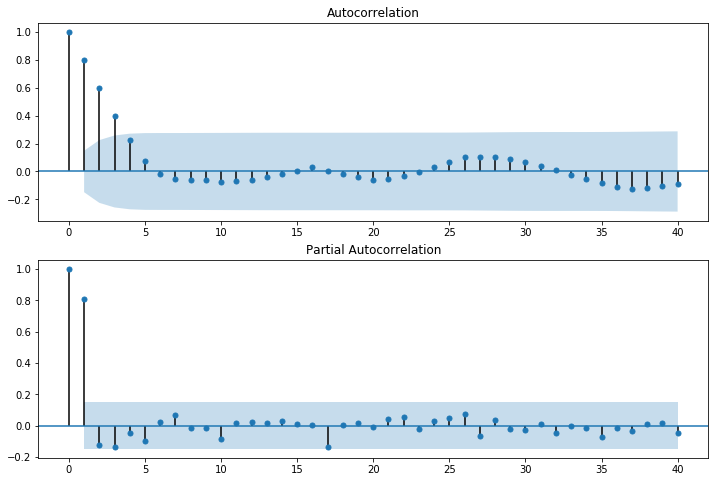

In [15]:
dta = travel

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

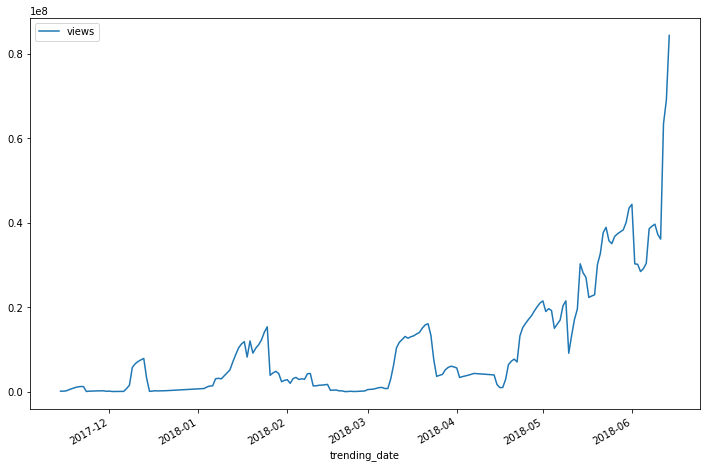

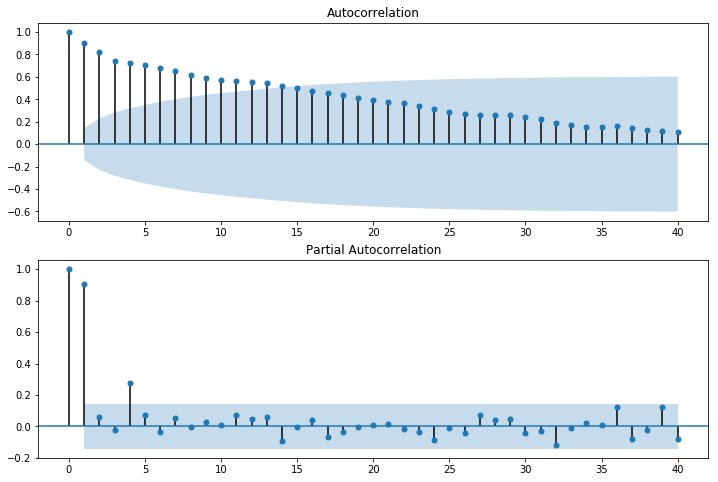

In [37]:
dta = gaming

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# comedy

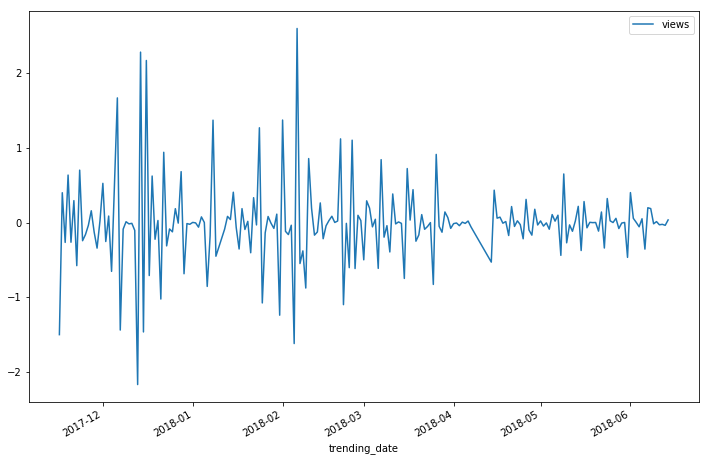

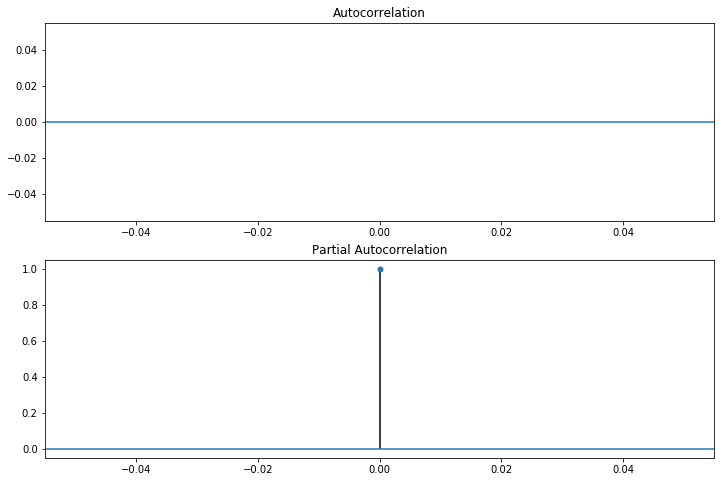

In [143]:
import numpy as np
dta = sports
dta = np.log(dta).diff().diff()

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [145]:
dta = dta.astype('float32').asfreq("1d").ffill()
dta = dta.iloc[1:]

arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit(disp=False)
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

arma_mod70 = sm.tsa.ARMA(dta, (9,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

const         -0.008078
ar.L1.views   -0.556654
dtype: float64
278.69285466877415 288.74842906920236 282.7575175604335
const         -0.007548
ar.L1.views   -0.664158
ar.L2.views   -0.194600
dtype: float64
272.7854528176233 286.1928853515276 278.2050033398358
const         -0.006756
ar.L1.views   -0.735544
ar.L2.views   -0.431994
ar.L3.views   -0.358939
dtype: float64
246.4617951879535 263.22108585533385 253.2362333407191
const         -0.006756
ar.L1.views   -0.735544
ar.L2.views   -0.431994
ar.L3.views   -0.358939
dtype: float64
246.4617951879535 263.22108585533385 253.2362333407191


In [146]:
from statsmodels.tsa.stattools import arma_order_select_ic
res = arma_order_select_ic(dta, ic=['aic'], trend='nc', max_ar=10, max_ma=10)
print(res.aic_min_order)

/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divi

(3, 10)


/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [147]:
arma_mod53 = sm.tsa.ARMA(dta, (3,10)).fit(disp=False)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2017-11-14':].plot(ax=ax)
fig = arma_mod53.plot_predict('2018-06-01', '2018-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [135]:
arma_mod53.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  views   No. Observations:                  212
Model:                     ARMA(5, 3)   Log Likelihood                  59.736
Method:                       css-mle   S.D. of innovations              0.179
Date:                Sun, 02 Dec 2018   AIC                            -99.472
Time:                        16:55:30   BIC                            -65.906
Sample:                    11-15-2017   HQIC                           -85.906
                         - 06-14-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0072      0.001      6.168      0.000       0.005       0.009
ar.L1.views     0.5102      0.071      7.136      0.000       0.370       0.650
ar.L2.views    -0.5689      0.079     -7.241      0.000      -0.723      -0.415
ar.L3.views     0.6733      0.074      9.094      0.000       0.528       0.818
ar.L4.views     0.1465      0.077      1.892      0.060      -0.005       0.298
ar.L5.views    -0.1396      0.071     -1.966      0.051      -0.279      -0.000
ma.L1.views    -0.6627      0.030    -21.741      0.000      -0.722      -0.603
ma.L2.views     0.6627      0.031     21.380      0.000       0.602       0.723
ma.L3.views    -1.0000      0.028    -35.659      0.000      -1.055      -0.945
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1407           -1.0032j            1.0130           -0.2722
AR.2           -0.1407           +1.0032j            1.0130            0.2722
AR.3           -2.3219           -0.0000j            2.3219           -0.5000
AR.4            1.2528           -0.0000j            1.2528           -0.0000
AR.5            2.3994           -0.0000j            2.3994           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.1686           -0.9857j            1.0000           -0.2770
MA.3           -0.1686           +0.9857j            1.0000            0.2770
-----------------------------------------------------------------------------
"""

In [140]:
print(arma_mod10.arroots)
print(arma_mod20.arroots)
print(arma_mod30.arroots)

[-10.73270567]
[-3.75405161  5.65583654]
[-1.61449563-0.j          0.8957395 -1.58656183j  0.8957395 +1.58656183j]


In [119]:
import statsmodels.tsa.api as smt
mdl = smt.AR(dta).fit(maxlag=7, ic='aic', trend='nc')
est_order = smt.AR(dta).select_order(maxlag=12, ic='aic', trend='nc')
print(est_order)

3


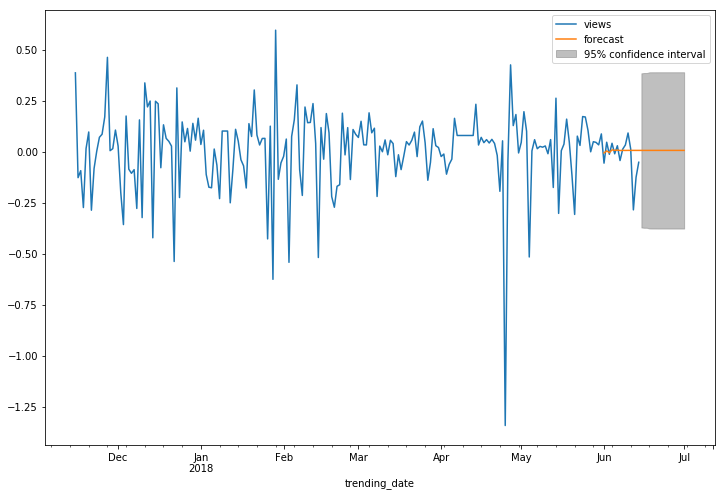

In [121]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2017-11-14':].plot(ax=ax)
fig = arma_mod30.plot_predict('2018-06-01', '2018-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

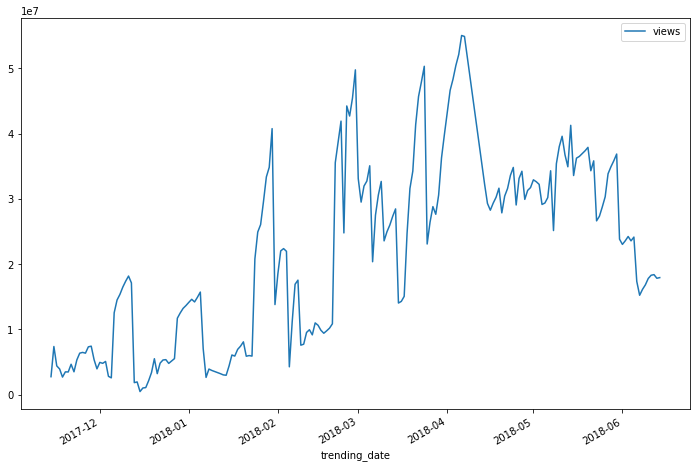

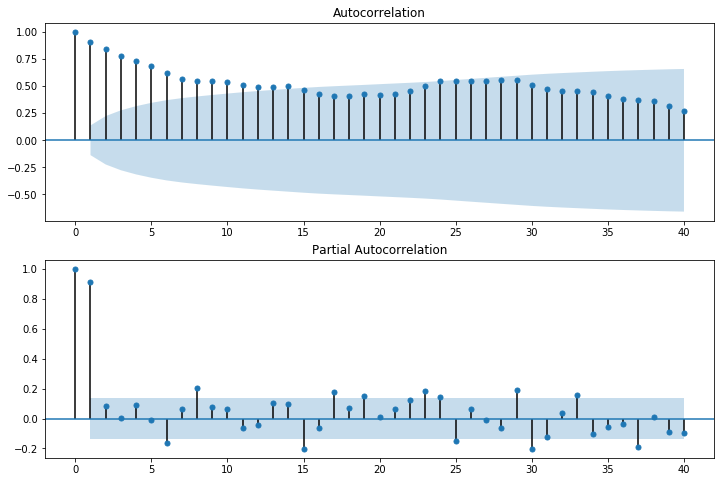

In [16]:
dta = sports

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

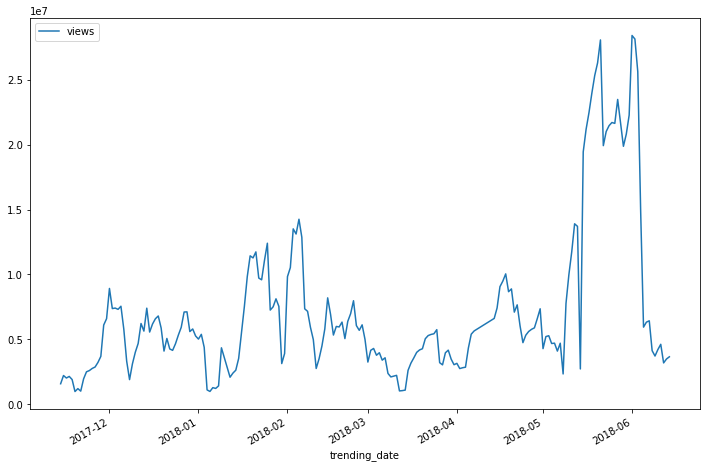

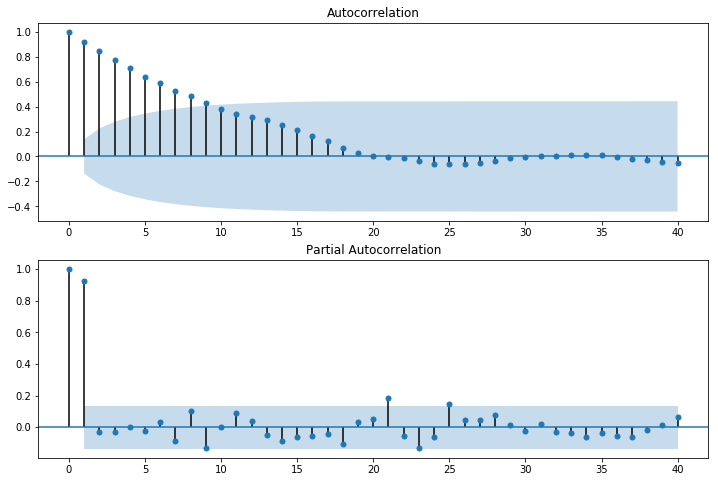

In [41]:
dta = news

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Music

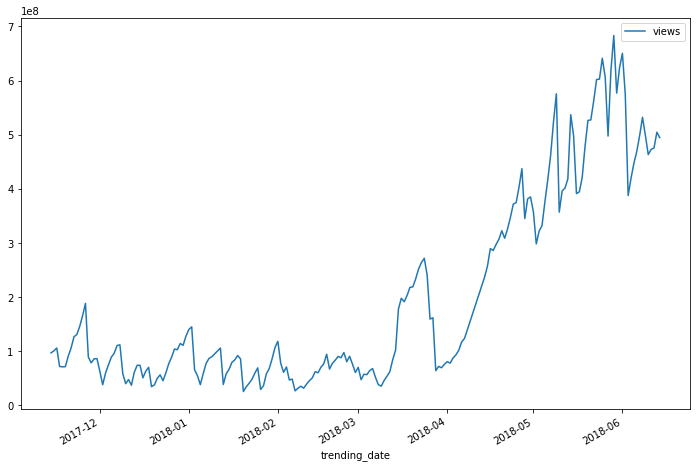

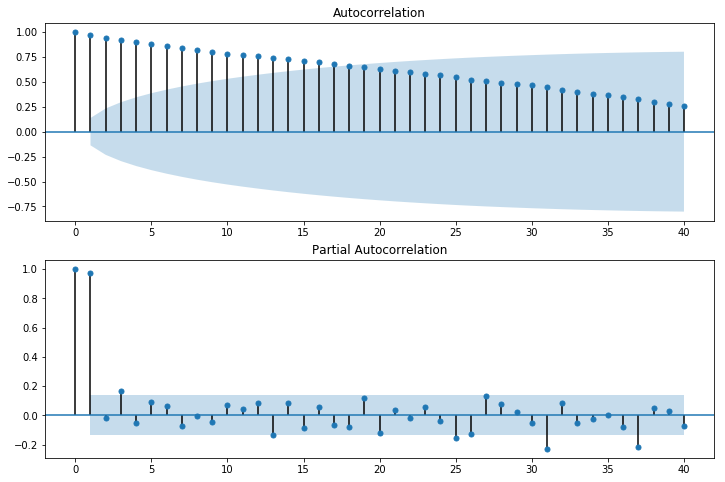

In [17]:
dta = music


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Entertainment

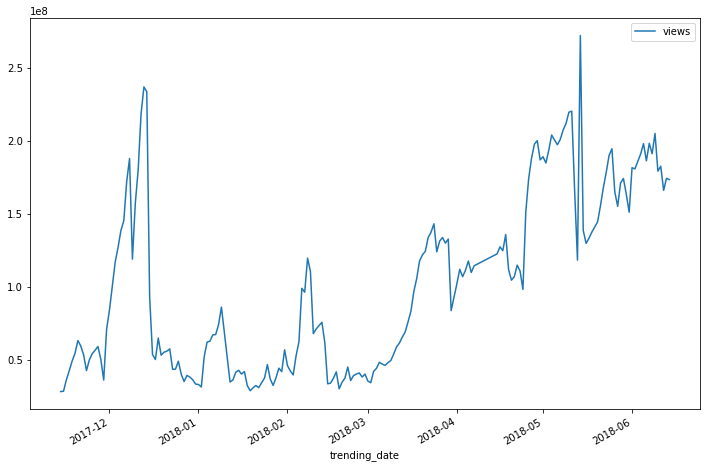

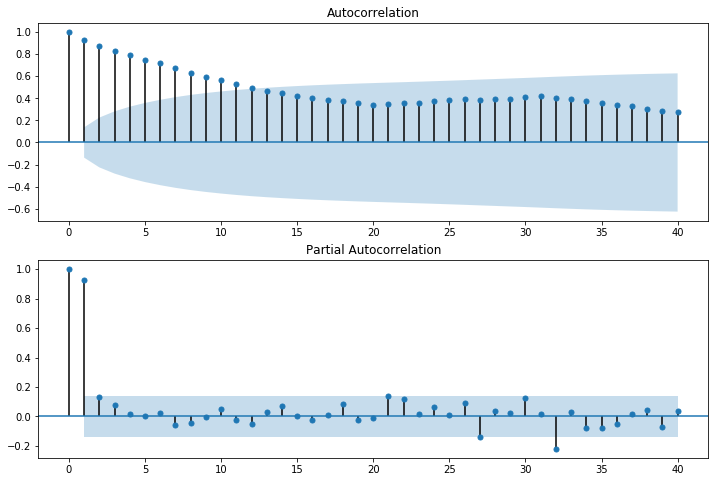

In [18]:
dta = entertainment


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# People & Blogs

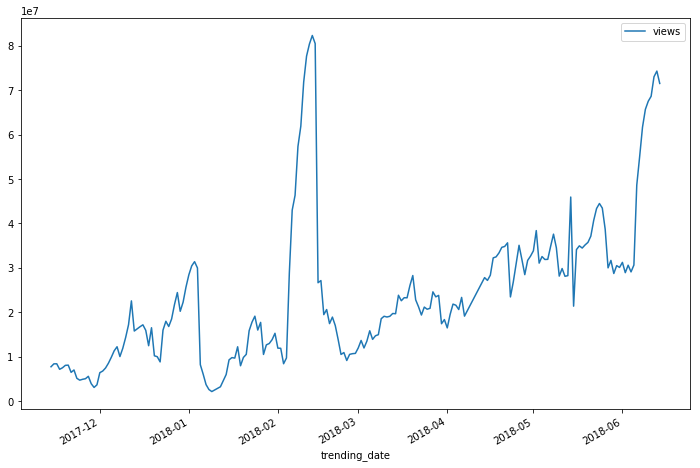

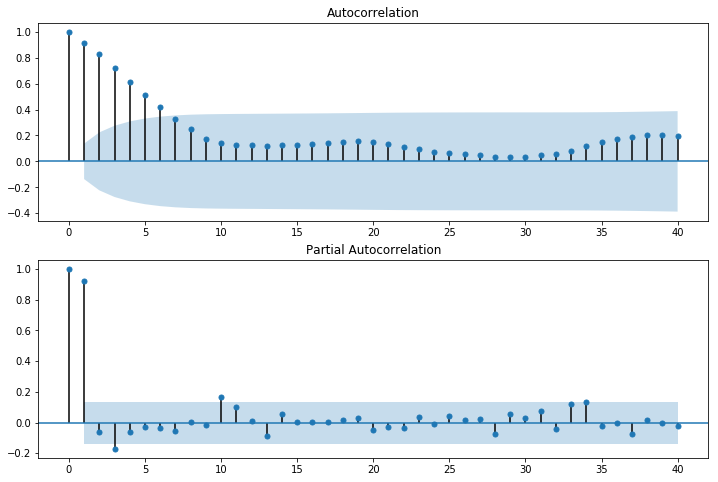

In [19]:
dta = ppl_blogs


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [20]:
dta = dta.astype('float32').asfreq("1d").ffill()

arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit(disp=False)
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


const          2.364511e+07
ar.L1.views    9.520211e-01
dtype: float64
7245.555670055082 7255.639546552211 7249.630900185407
const          2.364511e+07
ar.L1.views    9.896510e-01
ar.L2.views   -4.089866e-02
dtype: float64
7247.212267265842 7260.65743592868 7252.645907439607
const          2.364511e+07
ar.L1.views    9.823996e-01
ar.L2.views    1.424609e-01
ar.L3.views   -1.927292e-01
dtype: float64
7241.437050387742 7258.243511216288 7248.229100604949


In [21]:
print(arma_mod10.arroots)
print(arma_mod20.arroots)
print(arma_mod30.arroots)

[1.05039684]
[ 1.05659358 23.14104478]
[-2.3571545   1.10590836  1.9904226 ]


In [22]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))
print(sm.stats.durbin_watson(arma_mod20.resid.values))
print(sm.stats.durbin_watson(arma_mod30.resid.values))

1.8899687530662839
1.9770633773105084
1.9877958054612166


The durbin watson statistic is a number that tests for autocorrelation in the residuals and is always between 0 and 4, a value of 2 indicates no autocorrelation in the sample. Values from 0 to less than 2 indicate positive autocorrelation.

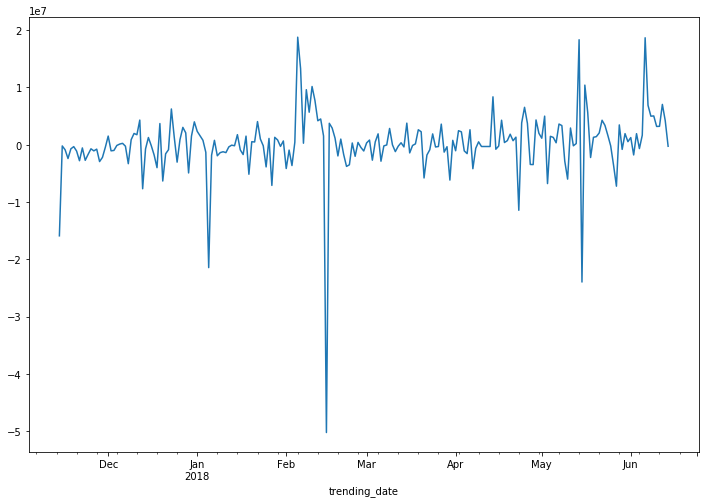

In [23]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
plt.show()

In [24]:
from scipy import stats
resid = arma_mod30.resid
print(stats.normaltest(resid))

NormaltestResult(statistic=197.48519935664623, pvalue=1.3080785705004112e-43)


The normaltestresult() shows a pvalue=1.500685248904302e-11, since the p-value < 0.05 we can reject the null that the residuals are normally distributed. The plot shows a heavy tail. 

In [25]:
dta = dta.asfreq("1d")

In [26]:
import statsmodels.tsa.api as smt
mdl = smt.AR(dta).fit(maxlag=7, ic='aic', trend='nc')

In [27]:
est_order = smt.AR(dta).select_order(maxlag=12, ic='bic', trend='nc')

print(est_order)

1


/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))
/anaconda3/lib/python3.5/site-packages/numpy/linalg/linalg.py:1817: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/anaconda3/lib/python3.5/site-packages/statsmodels/tools/numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [28]:
dta.head()

,views
trending_date,
2017-11-14,7753285.0
2017-11-15,8407922.0
2017-11-16,8423782.0
2017-11-17,7180424.0
2017-11-18,7526963.0


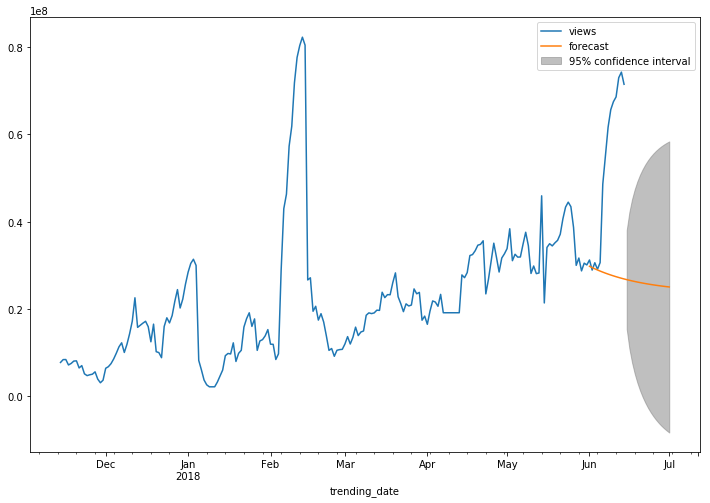

In [29]:
#predict_sunspots = arma_mod10.predict('2018-06-01', '2018-07-01', dynamic=True)
#print(predict_sunspots)

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2017-11-14':].plot(ax=ax)
fig = arma_mod10.plot_predict('2018-06-01', '2018-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

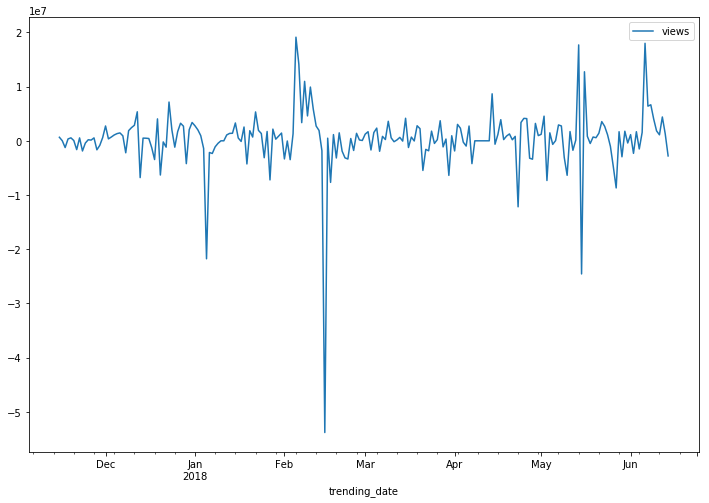

/anaconda3/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


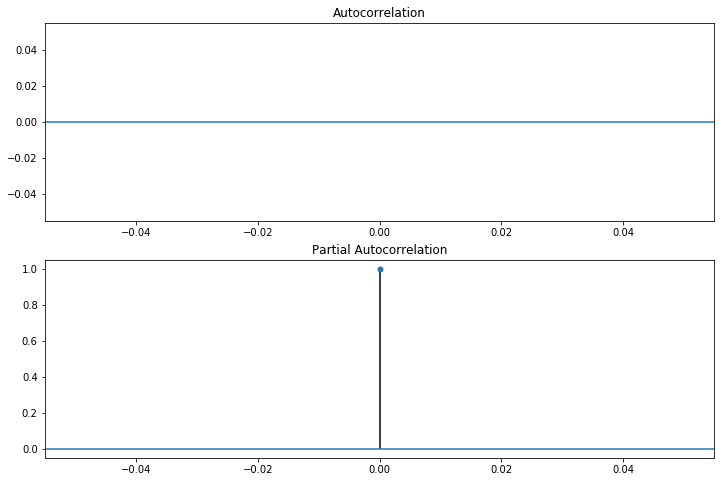

In [30]:
dta.diff().plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.diff().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.diff(), lags=40, ax=ax2)
plt.show()

In [31]:
arima = sm.tsa.ARIMA(dta, order=(2,1,1)).fit()

In [32]:
arima.arroots, arima.maroots

(array([ 2.34445377, -2.90552787]), array([12.51810991]))

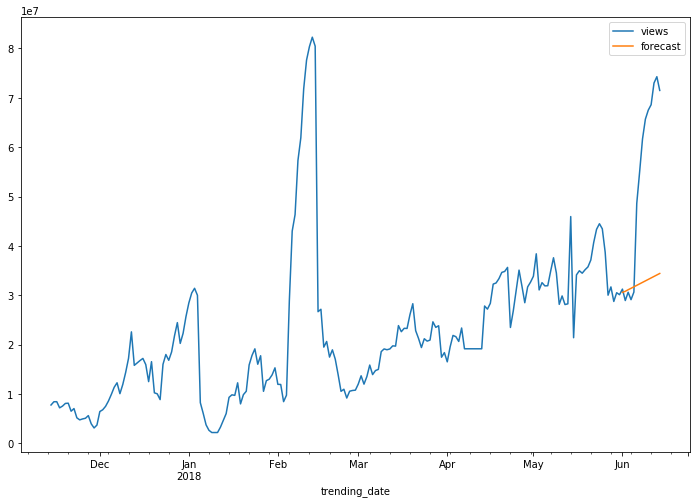

In [33]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))
dta.plot(ax=ax);
arima.plot_predict(plot_insample=False, dynamic=True, start="2018-06-01", ax=ax);

I'm going to try to forecast for all categories using VARS.

In [34]:
dta = youtube_views.groupby('trending_date')['views','likes','dislikes','comment_count'].agg({"views": "sum","likes":"sum","dislikes":"sum","comment_count":"sum"})

In [35]:
dta = dta.reset_index()
dta = dta.rename(columns={ dta.columns[0]: "Date" })
dta.head()

,Date,dislikes,comment_count,views,likes
0,2017-11-14,270876,691402,185435246,7637635
1,2017-11-15,313577,709009,212445216,7601148
2,2017-11-16,338755,735962,227365391,7886807
3,2017-11-17,341176,814596,193541711,7143580
4,2017-11-18,322349,901370,196846875,8393717


# Comparing US Youtube Engagement with US economic data

Now I'm going to combine this data frame with s&p and dow jones index data and cryptocurrency data for the same time period.

In [36]:
sp500 = pd.read_csv("../data/snp500.csv")
dowjones = pd.read_csv("../data/dowjones.csv")
ethereum = pd.read_csv("../data/ETH-USD.csv")
bitcoin = pd.read_csv("../data/BTC-USD.csv")

FileNotFoundError: File b'../data/snp500.csv' does not exist

In [ ]:
#rename columns for after i merge tables
sp500 = sp500.add_prefix('s&p_')
dowjones = dowjones.add_prefix('dow_')
ethereum = ethereum.add_prefix("etc_")
bitcoin = bitcoin.add_prefix("btc_")



In [ ]:
sp500 = sp500.rename(columns={ sp500.columns[0]: "Date" })
dowjones = dowjones.rename(columns={ dowjones.columns[0]: "Date" })
ethereum = ethereum.rename(columns={ ethereum.columns[0]: "Date" })
bitcoin = bitcoin.rename(columns={ bitcoin.columns[0]: "Date" })

In [ ]:
#merge tables sp500,dowjones,ethereum,bitcoin,dta by date
from functools import reduce
data_frames = [sp500,dowjones, ethereum, bitcoin]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

In [ ]:
dta['Date'] = pd.to_datetime(dta['Date'])

In [ ]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

In [ ]:
result = pd.merge(dta, df_merged, on='Date')

In [ ]:
result.to_csv('../data/youtube_econ.csv')

In [ ]:
#forward fill missing values
complete = result.fillna(method='ffill')

In [ ]:
complete

In [ ]:
import numpy as np
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR